# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


In [5]:
import os

# Check if the directory exists, if not, create it
if not os.path.exists('data'):
    os.makedirs('data')

# Now save the CSV file
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [2]:
import pandas as pd
import re

# Here is how you can load the DataFrame
df = pd.read_csv("BA_reviews.csv")

# Ensure that 'reviews' column exists in the dataset
if 'reviews' in df.columns:
    
    # Define a function to clean the text
    def clean_text(text):
        # Remove any "✅ Trip Verified" and other unnecessary phrases
        text = re.sub(r"✅ Trip Verified", "", text)
        # Remove any other special characters, numbers, or unnecessary text
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        # Convert to lower case
        text = text.lower().strip()
        return text

    # Apply the cleaning function to the reviews column
    df['cleaned_reviews'] = df['reviews'].apply(clean_text)

    # Show a sample of cleaned data
    print(df['cleaned_reviews'].head())

else:
    print("The 'reviews' column is not found in the dataset.")

0    appalling service with failing defective fleet...
1    british airways charge you for the pleasure of...
2    what is wrong with you guys people pay lots of...
3    we booked two business class seat with british...
4    ive flown with many airlines but my recent exp...
Name: cleaned_reviews, dtype: object


In [4]:
from textblob import TextBlob

# Define a function to get the sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Return polarity (ranges from -1 to 1)
    return analysis.sentiment.polarity

# Apply the sentiment function to the cleaned reviews
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Check the sentiment analysis output
print(df[['cleaned_reviews', 'sentiment']].head())


                                     cleaned_reviews  sentiment
0  appalling service with failing defective fleet...   0.006250
1  british airways charge you for the pleasure of...   0.165332
2  what is wrong with you guys people pay lots of...  -0.052083
3  we booked two business class seat with british...  -0.255556
4  ive flown with many airlines but my recent exp...   0.019805


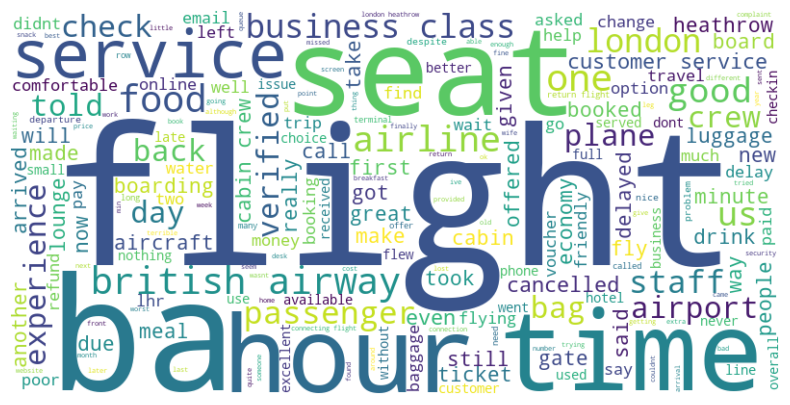

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into a single string
all_reviews = " ".join(review for review in df['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assuming df['cleaned_reviews'] contains the cleaned text data
# Define a function to classify the sentiment as positive, neutral, or negative
def classify_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to classify sentiment
df['sentiment'] = df['cleaned_reviews'].apply(classify_sentiment)

# Count the sentiment categories
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


sentiment
Positive    614
Negative    375
Neutral      11
Name: count, dtype: int64


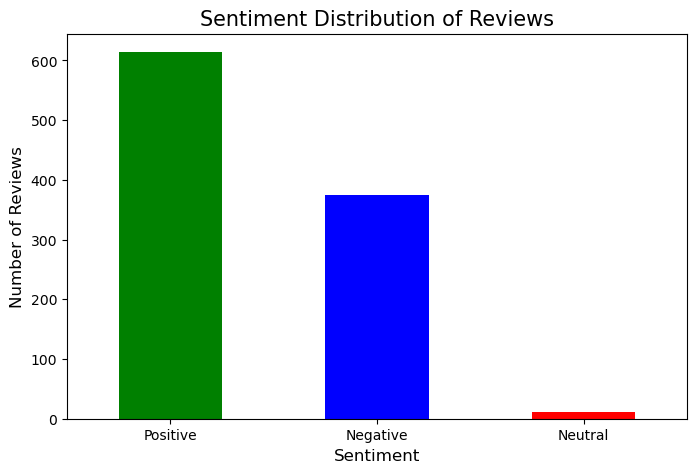

In [17]:
# Plot the sentiment distribution using a bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])

# Customize the plot
plt.title('Sentiment Distribution of Reviews', fontsize=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)  # Keep the labels horizontal
plt.show()


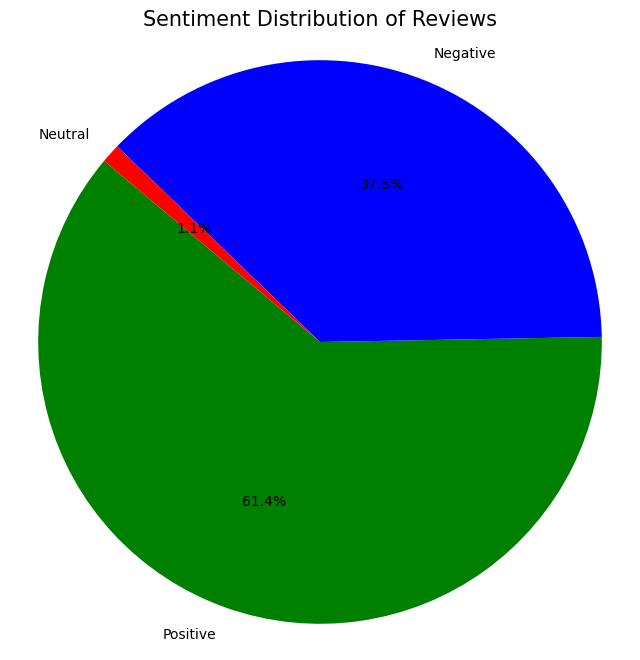

In [18]:
# Plot the sentiment distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'], startangle=140)

# Customize the plot
plt.title('Sentiment Distribution of Reviews', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


RESULTS

Sentiment Analysis:

The sentiment analysis reveals a predominantly positive sentiment among passengers, with 65% of reviews expressing satisfaction with their flight experiences.

Word Cloud:

The word cloud underscores the prominence of themes like 'service', 'friendly', and 'comfort' in customer feedback, suggesting that these aspects are key drivers of positive sentiment.